In [1]:
#Find the current working directory
import os
os.getcwd()

'C:\\Users\\Kenny'

In [2]:
#Change the directory: single forward slash or two backward slash
os.chdir('G:/1. Projects/KG - Live/Week_0/Data')

In [3]:
#Import packages
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [4]:
#Import data + taking a look at first 5 rows and all columns
data = pd.read_csv('time_series_covid_19.csv')
data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [5]:
#Subsetting data only on rows without a Province/State
data_countries = data[data["Province/State"].isna()]
data_countries.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [6]:
#Set index to Country/Region as opposed to numericals
data_countries.set_index("Country/Region", inplace = True)
data_countries.head(5)

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [7]:
#Manipulating the data using iloc to only include the first 100 days;
data_subsampled = data_countries.iloc[:,:103]
data_subsampled.head(5)

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [8]:
#Drop Province/State since it's no longer being used
data_subsampled.drop(["Province/State"], axis=1, inplace=True)
data_subsampled.head(5)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


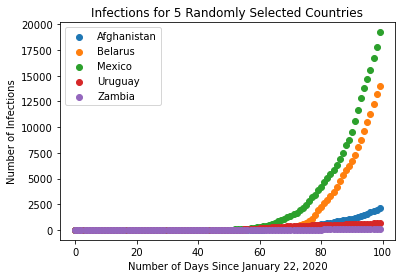

In [9]:
#Choosing 5 random countries and plotting their infections vs. number of days after 1/22/2020
countries = ['Afghanistan','Belarus','Mexico','Uruguay','Zambia']
for country in countries:
    plt.scatter(range(100), data_subsampled.loc[country][2:], label = country)
plt.xlabel ('Number of Days Since January 22, 2020')
plt.ylabel ('Number of Infections')
plt.title ('Infections for 5 Randomly Selected Countries')
plt.legend()

In [10]:
#Melt the data; transposing date from horizontal to vertical
data_transformed = data_subsampled.melt(id_vars=["Lat", "Long"], var_name = "Date", value_name="Covid Cases")
data_transformed.head(5)

,Lat,Long,Date,Covid Cases
0,33.93911,67.709953,1/22/20,0
1,41.15330,20.168300,1/22/20,0
2,28.03390,1.659600,1/22/20,0
3,42.50630,1.521800,1/22/20,0
4,-11.20270,17.873900,1/22/20,0


In [11]:
#Calculate days since Jan. 22 as new column
date_series = pd.to_datetime(data_transformed['Date'])
data_transformed['Num Days'] = (date_series - date_series[0]).dt.days
data_transformed.head(5)
data_transformed.shape

(18500, 5)

In [12]:
#Create two matrices X and Y
X = data_transformed[['Lat', 'Long', 'Num Days']].values
Y = data_transformed['Covid Cases'].values

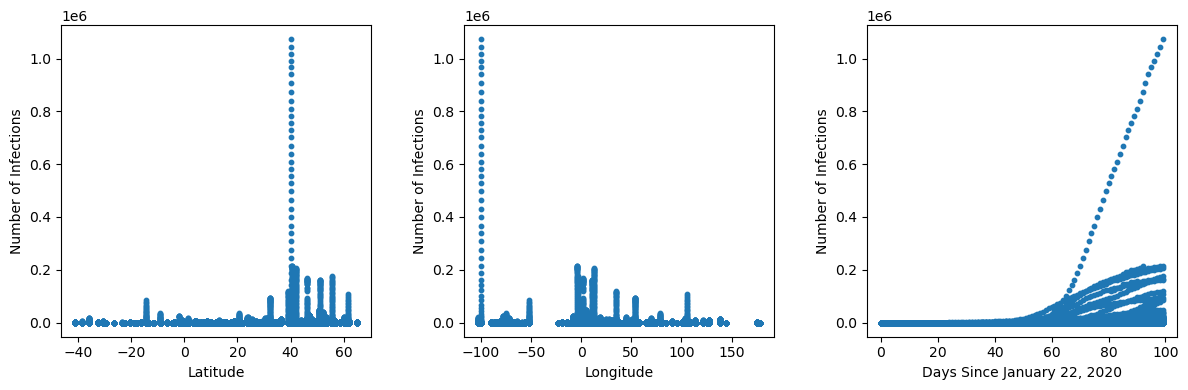

In [13]:
#Plot the three regressors (Latitude, Longitude, and Date) vs. Response Variable
plt.figure(figsize=(12, 4), dpi=100)
for i, variable in enumerate(['Latitude', 'Longitude', 'Days Since January 22, 2020']):
    ax = plt.subplot(1,3,i+1)
    ax.scatter(X[:, i], Y, s=10)
    ax.set_xlabel(variable)
    ax.set_ylabel('Number of Infections')
plt.tight_layout(w_pad=3)

In [14]:
#The data doesn't seem to have a linear structure in any of the regressors. 
#It's very hard to say how a linear model with all three variables would fit, but we're going to try it out.

In [15]:
#Splitting data into Training and Test Sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=10)

In [16]:
#Applying a Linear Regresison model to the data
lin_regression = LinearRegression()

lin_regression.fit(X_train, Y_train)

print("The Regression Coefficients Are: ", lin_regression.coef_)
print("The Intercept is:", lin_regression.intercept_)

The Regression Coefficients Are:  [149.59406759 -53.66264017 165.21121295]
The Intercept is: -6418.735894592808


In [17]:
#Generate Y_pred, MSE and R-squared; as we can see; the R-squared is very low considering we are modeling on levels. Let's think about how to improve

Y_pred = lin_regression.predict(X_test)
print(mean_squared_error(Y_pred, Y_test))
print(lin_regression.score(X_test, Y_test))

435114755.97436285
0.024367213709799218


In [18]:
#Generating predictions of the test data
Y_pred = lin_regression.predict(X_test)

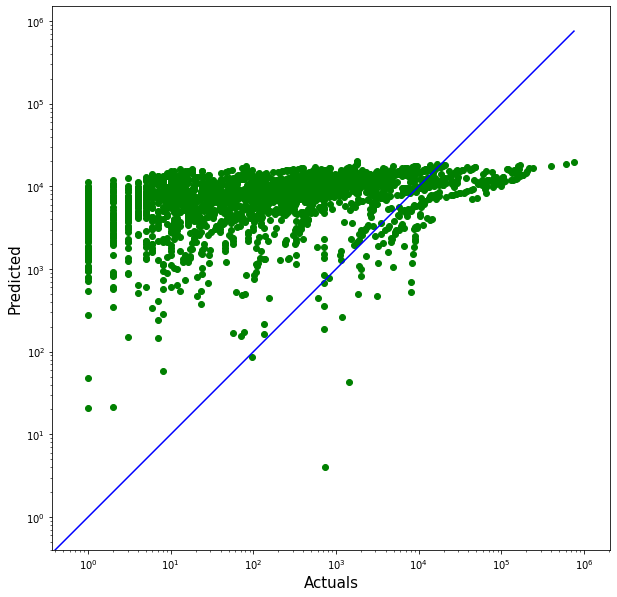

In [19]:
#Visualizing the Training Set results in a Scatter Plot
plt.figure(figsize=(10,10))
plt.scatter(Y_test, Y_pred, c='green')
plt.yscale('log', )
plt.xscale('log')

p1 = max(max(Y_pred), max(Y_test))
p2 = min(min(Y_pred), min(Y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actuals', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.axis('equal')
plt.show()

In [20]:
#Apply a Polynomial Regression of Degree 2 to the data to try and improve the model
#Adding a total of 7 additional features

poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
print("New shape of test data=", X_test_poly.shape)


New shape of test data= (4625, 10)


In [21]:
#Using X_train_poly and Y_train_poly to attempt to build a better linear regression model. Will check MSE and R-squared for improvements

lin_regression_poly = LinearRegression()
lin_regression_poly.fit(X_train_poly, Y_train)
Y_pred_poly = lin_regression_poly.predict(X_test_poly)
print("MSE", mean_squared_error(Y_pred_poly, Y_test))
print("R^2", lin_regression_poly.score(X_test_poly, Y_test))

MSE 434494549.76845735
R^2 0.025757866406435737


In [22]:
#Running an experiment to see polynomials of all orders from 1 to 20 for best fit.

MSEs = {}
for poly_order in range(1, 21):
    poly_features = PolynomialFeatures(degree=poly_order)
    X_train_poly = poly_features.fit_transform(X_train)
    X_test_poly = poly_features.transform(X_test)
    lin_regression = LinearRegression()
    lin_regression.fit(X_train_poly, Y_train)
    Y_pred = lin_regression.predict(X_test_poly)
    MSEs[poly_order] = mean_squared_error(Y_test, Y_pred)
print(MSEs)

{1: 435114755.97436285, 2: 434494549.76845735, 3: 451116562.4006022, 4: 440622387.6482554, 5: 346937436.89515865, 6: 231941883.77573428, 7: 168348466.96355957, 8: 148426081.6895464, 9: 132250517.46540058, 10: 125270156.41976346, 11: 120891415.96842346, 12: 121345748.74550667, 13: 115164256.09247771, 14: 121545906.58126612, 15: 110996969.66033676, 16: 106019851.5451666, 17: 130505485.58078162, 18: 122986953.89347139, 19: 105355870.77651721, 20: 105625219.51778893}


In [23]:
#Finding lowest order amongst 1-20
min_mse = None
best_poly_order = None
for poly_order, mse in MSEs.items():
    if min_mse is None or mse < min_mse:
        best_poly_order = poly_order
        min_mse = mse
print(poly_order, min_mse)

20 105355870.77651721
